In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\data.csv")


# Check the first few rows
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [2]:
# Check for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [8]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [9]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [10]:
#Analysis

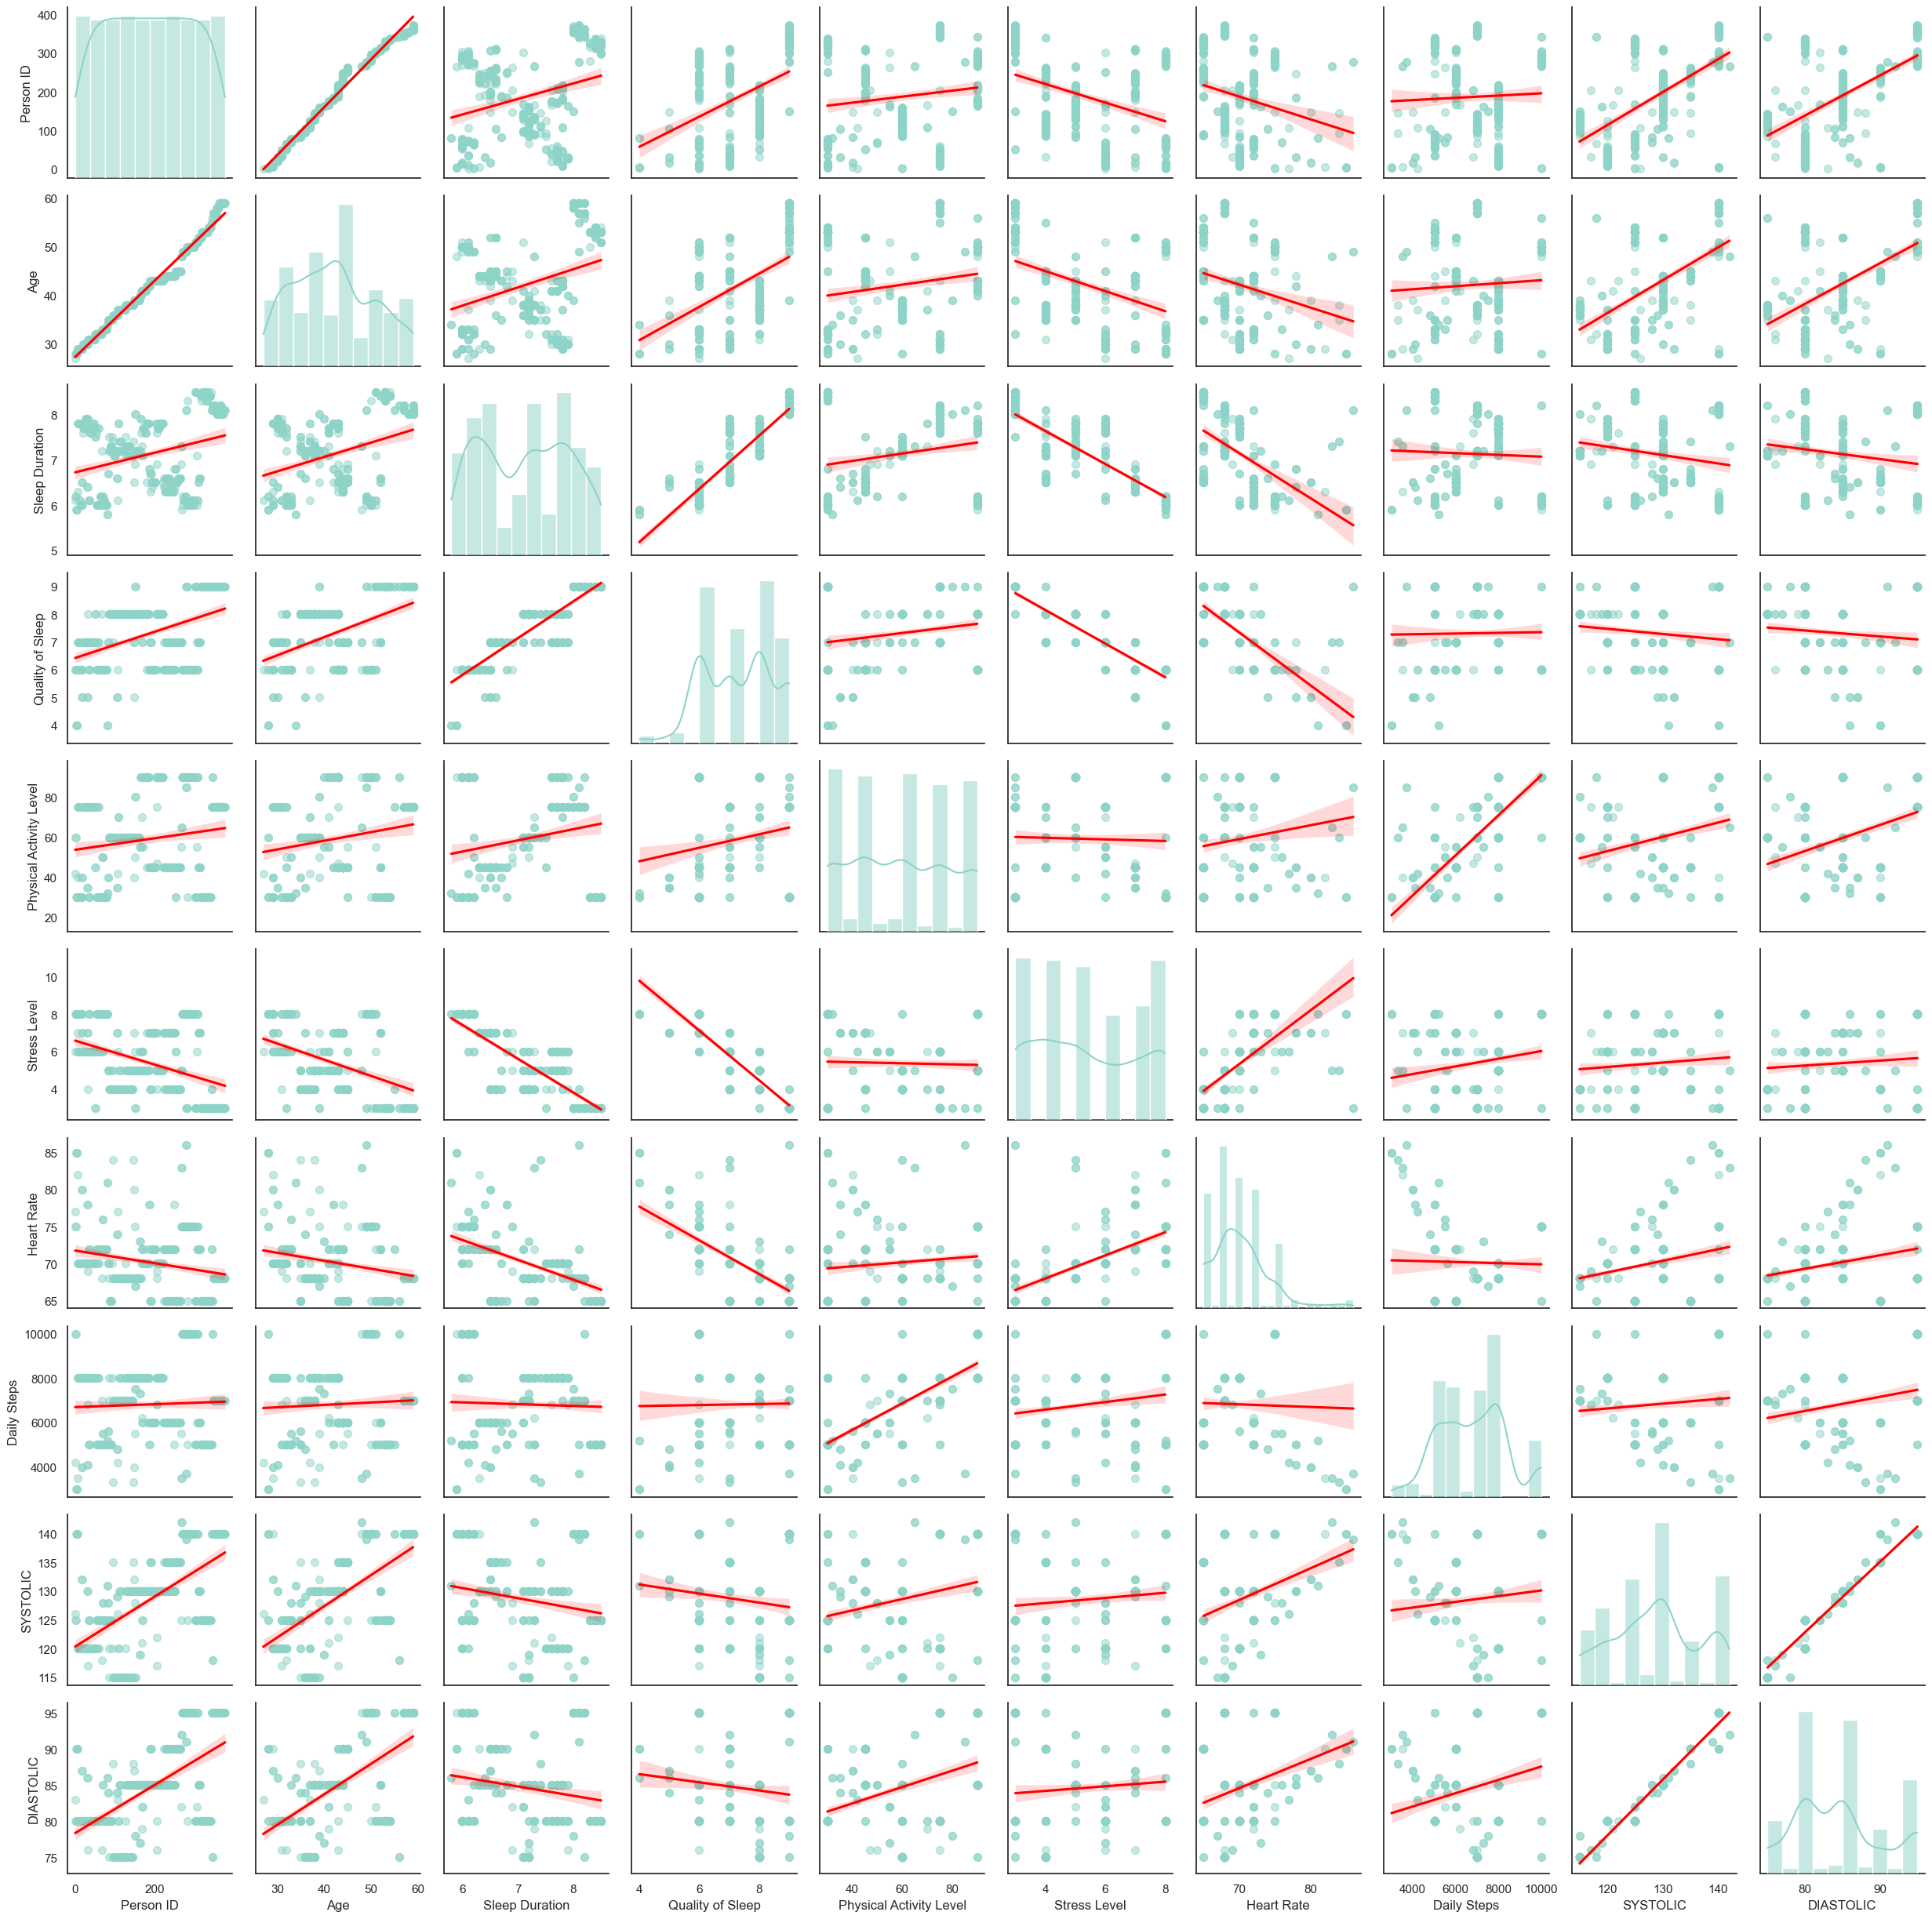

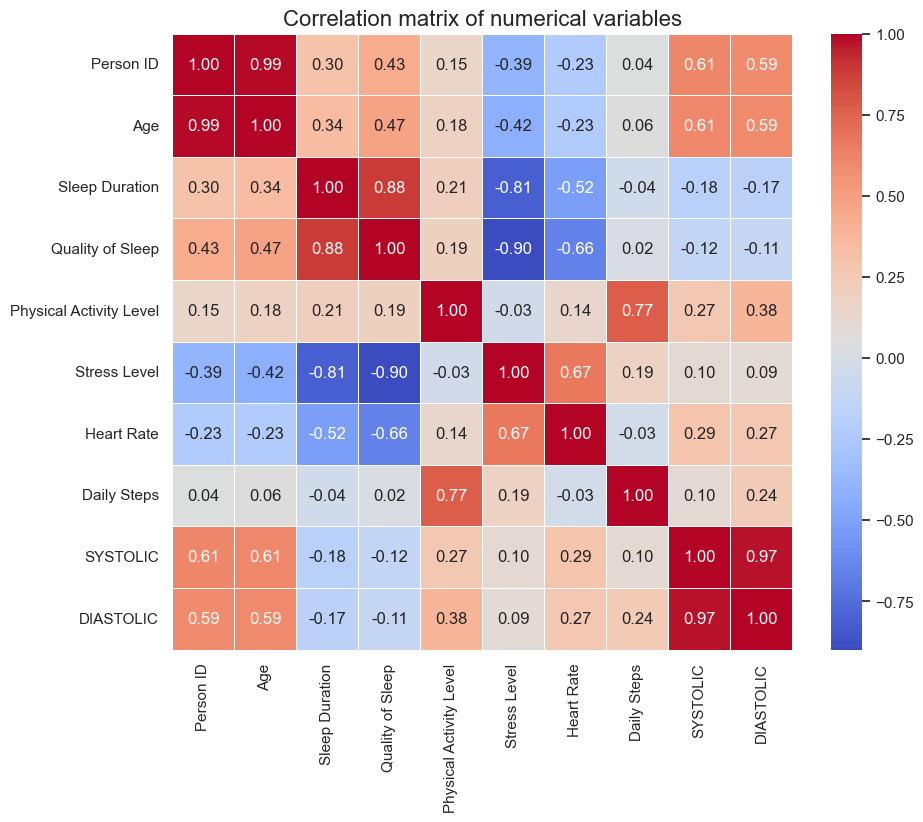

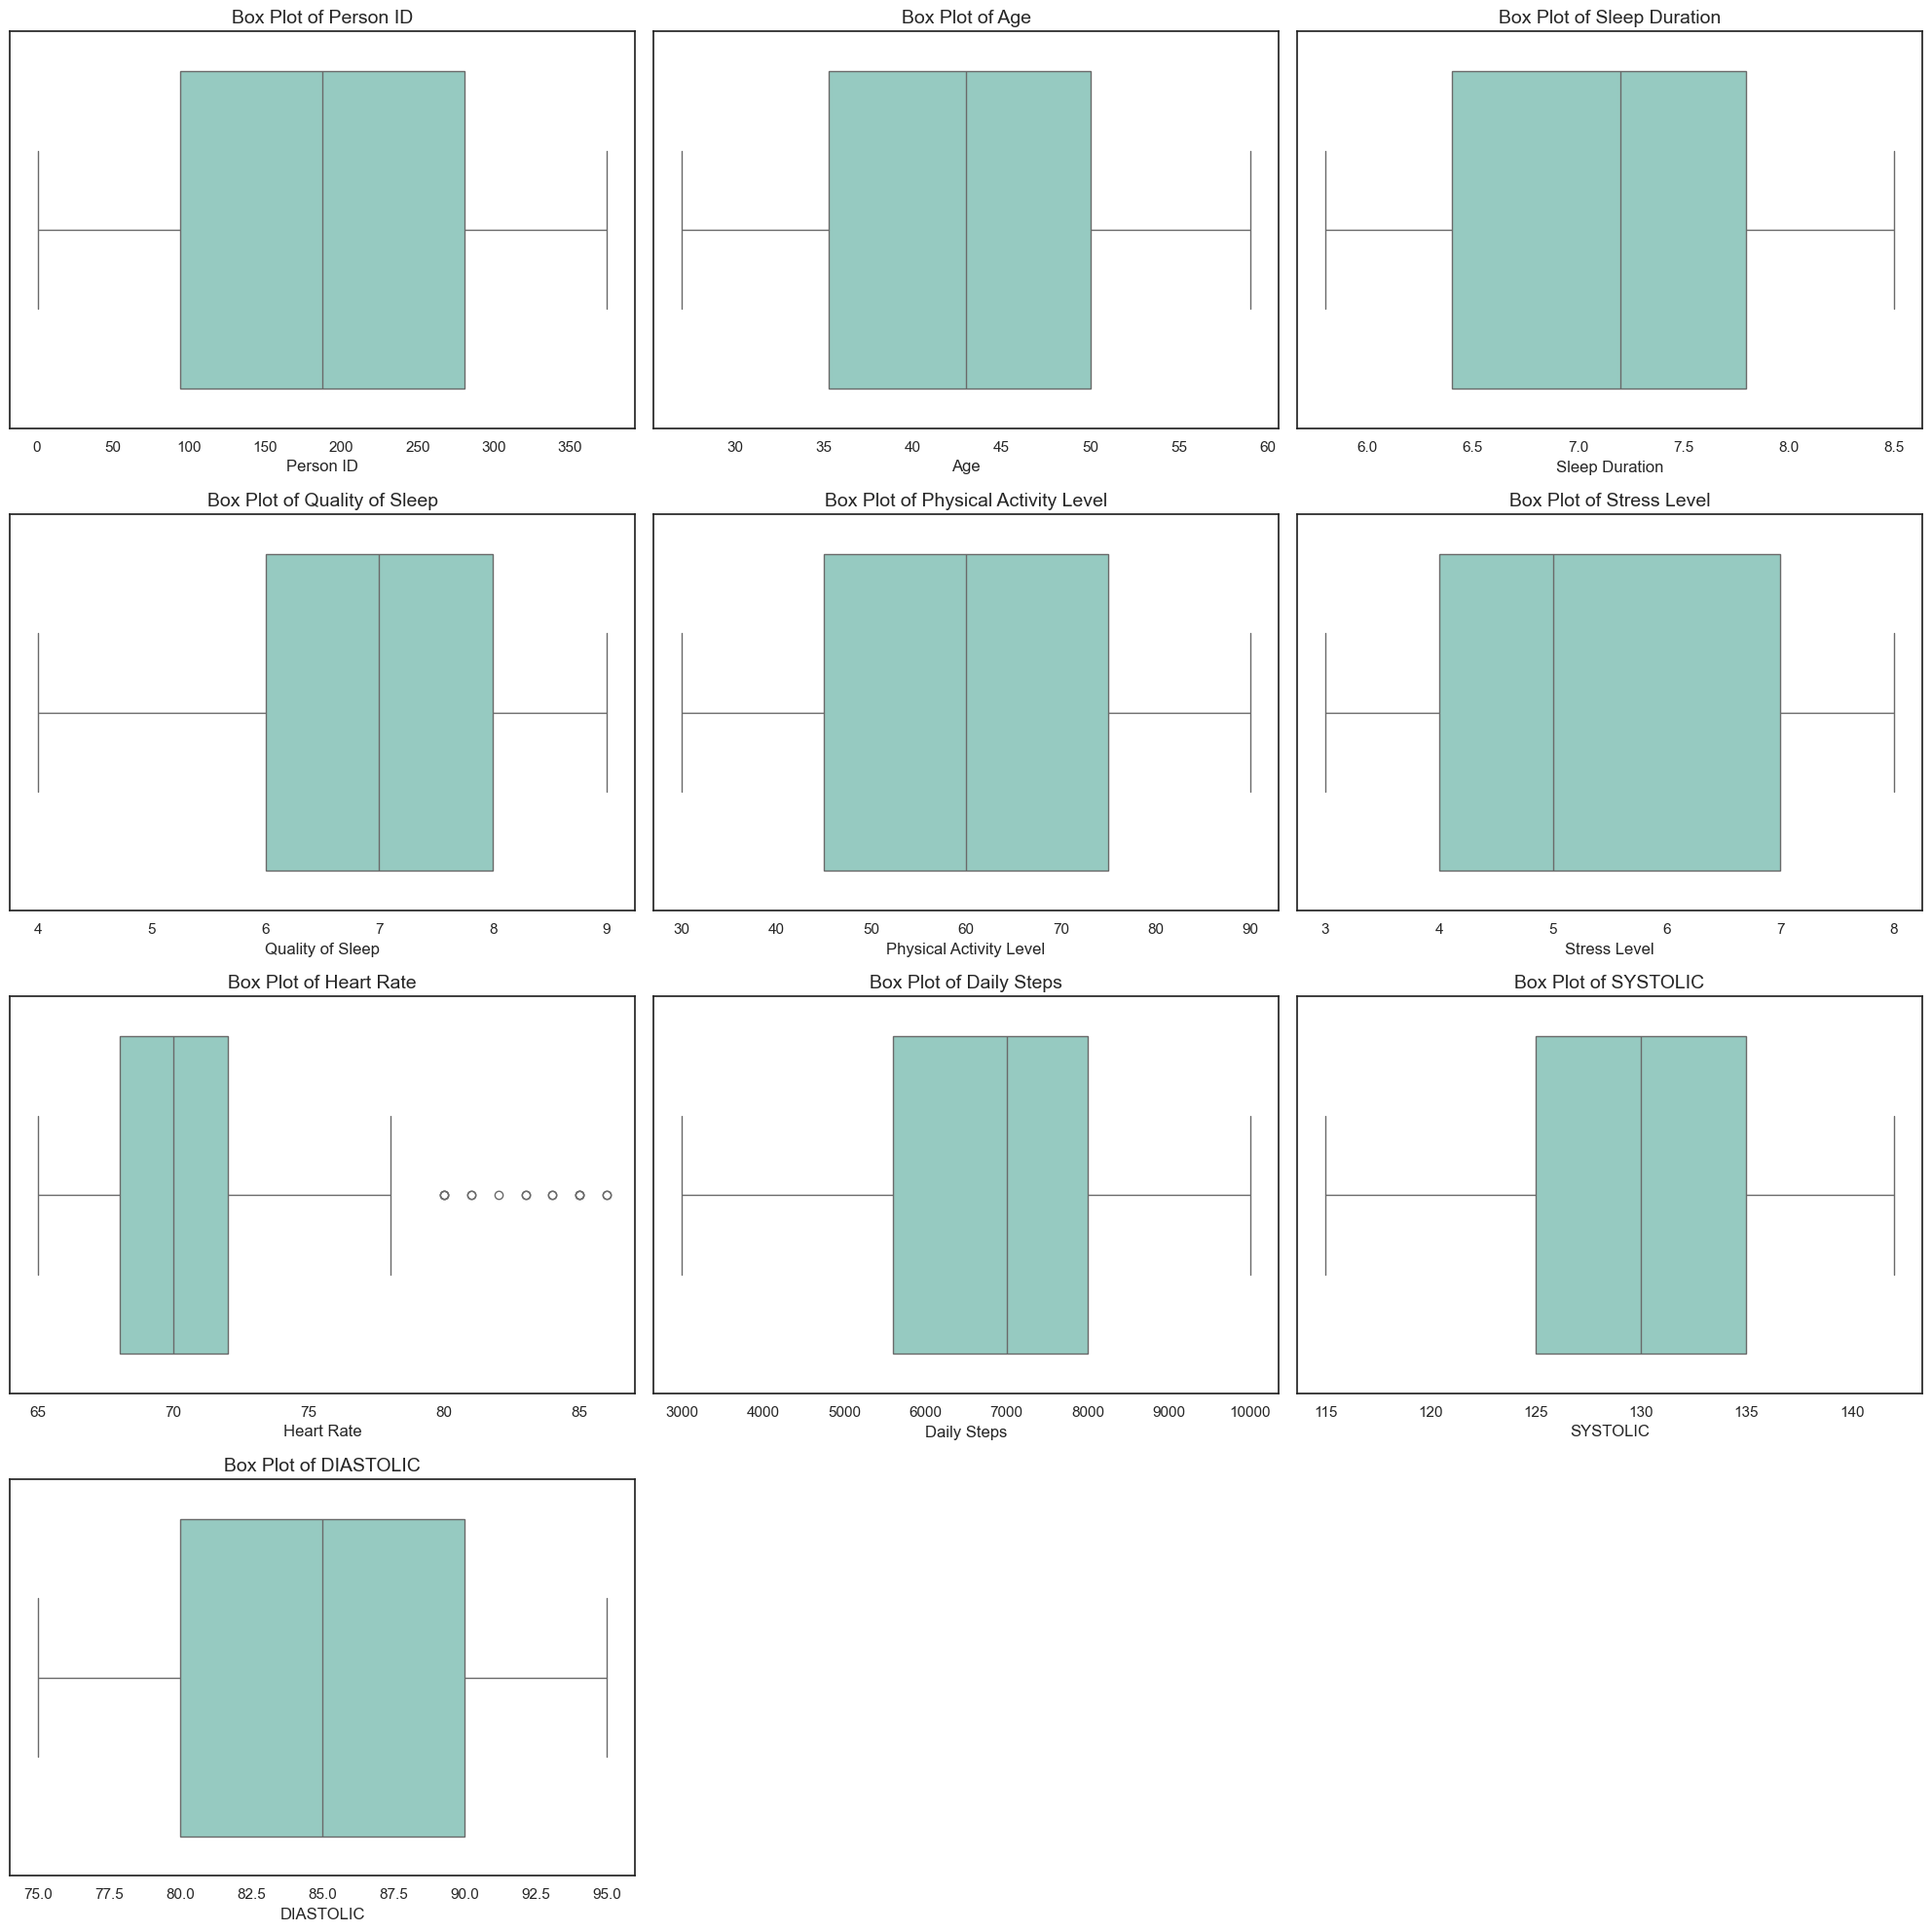

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seaborn settings
sns.set(style="white")
sns.set_palette(palette='Set3')

# List of key numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# PairGrid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements
pair_grid = sns.PairGrid(data=df[num_vars], diag_sharey=False)
pair_grid.map_diag(sns.histplot, kde=True)
pair_grid.map_offdiag(sns.regplot, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Correlation matrix
corr_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,linewidths=0.5)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()

# Box plots to identify any outliers (updated with dynamic grid layout)
num_vars_count = len(num_vars)
ncols = 3  # Number of columns for the grid
nrows = math.ceil(num_vars_count / ncols)  # Dynamically calculate rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy access

for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)

# Turn off unused axes
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


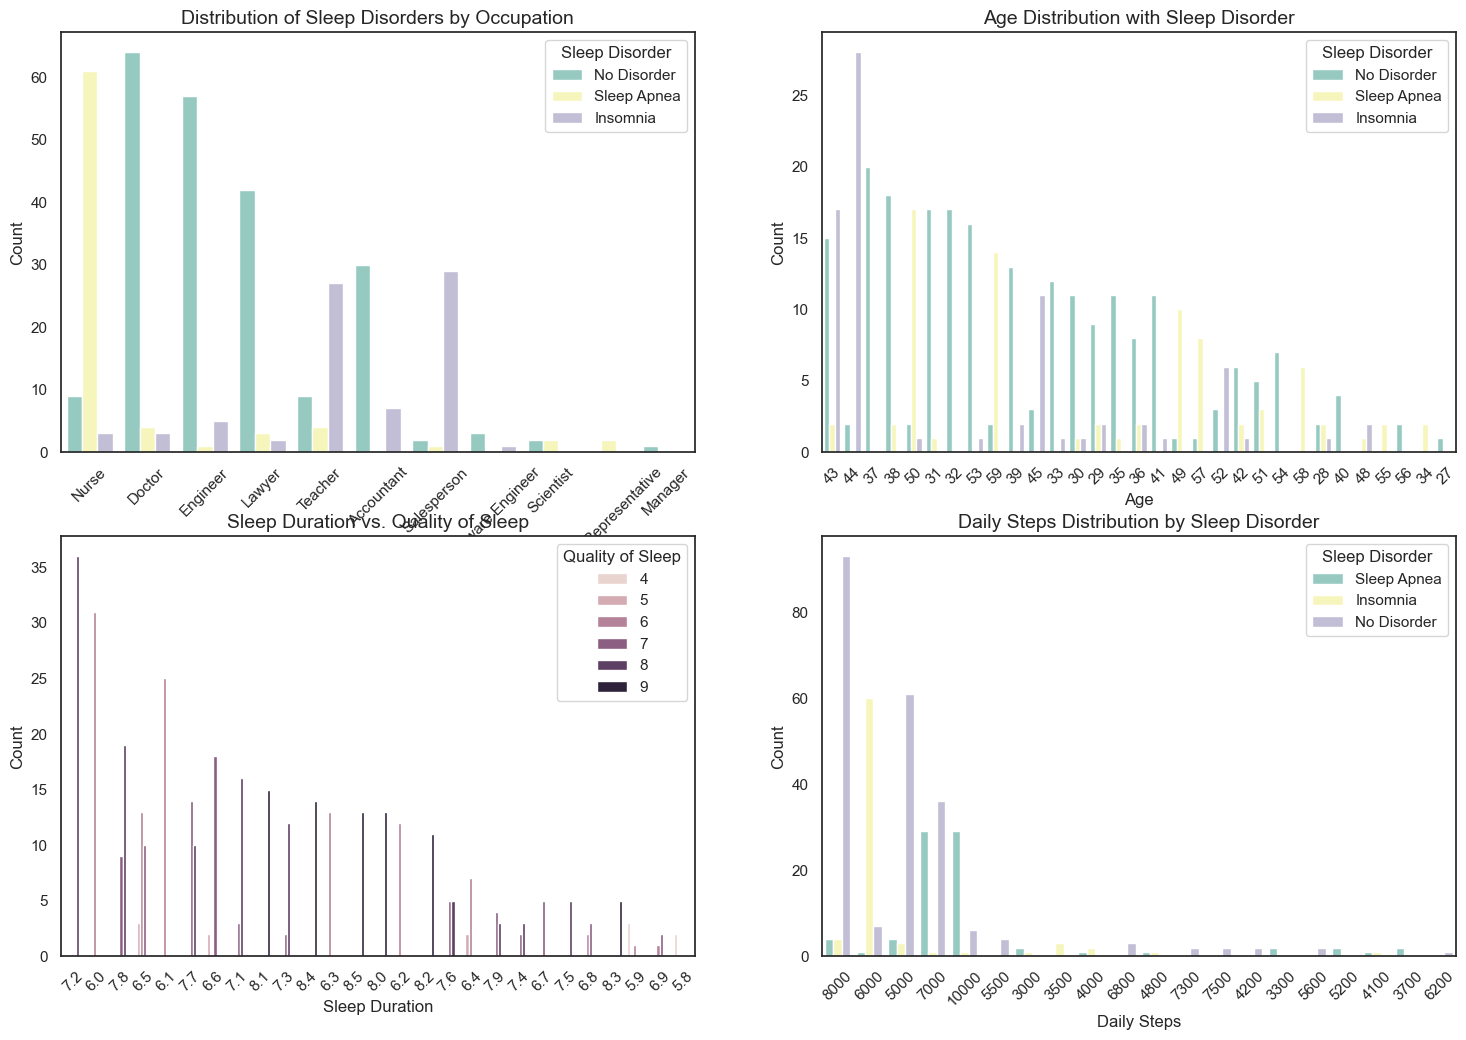

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Distribution of Sleep Disorders by Occupation
sns.countplot(x='Occupation',hue='Sleep Disorder', data=df,ax=axes[0, 0],order=df['Occupation'].value_counts().index)
axes[0, 0].set_title('Distribution of Sleep Disorders by Occupation', fontsize=14)
axes[0, 0].set_xlabel('Occupation', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Age Distribution with Sleep Disorder
sns.countplot(x='Age',hue='Sleep Disorder', data=df,ax=axes[0, 1],order=df['Age'].value_counts().index)
axes[0, 1].set_title('Age Distribution with Sleep Disorder', fontsize=14)
axes[0, 1].set_xlabel('Age', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)


# Plot 3: Sleep Duration vs. Quality of Sleep
sns.countplot(x='Sleep Duration',hue='Quality of Sleep', data=df,ax=axes[1, 0],order=df['Sleep Duration'].value_counts().index)
axes[1, 0].set_title('Sleep Duration vs. Quality of Sleep', fontsize=14)
axes[1, 0].set_xlabel('Sleep Duration', fontsize=12)  # Adjusted label to fit x-axis category
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Daily Steps Distribution by Sleep Disorder
sns.countplot(x='Daily Steps',hue='Sleep Disorder', data=df,ax=axes[1, 1],order=df['Daily Steps'].value_counts().index)
axes[1, 1].set_title('Daily Steps Distribution by Sleep Disorder', fontsize=14)
axes[1, 1].set_xlabel('Daily Steps', fontsize=12)  # Adjusted label to fit x-axis category
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

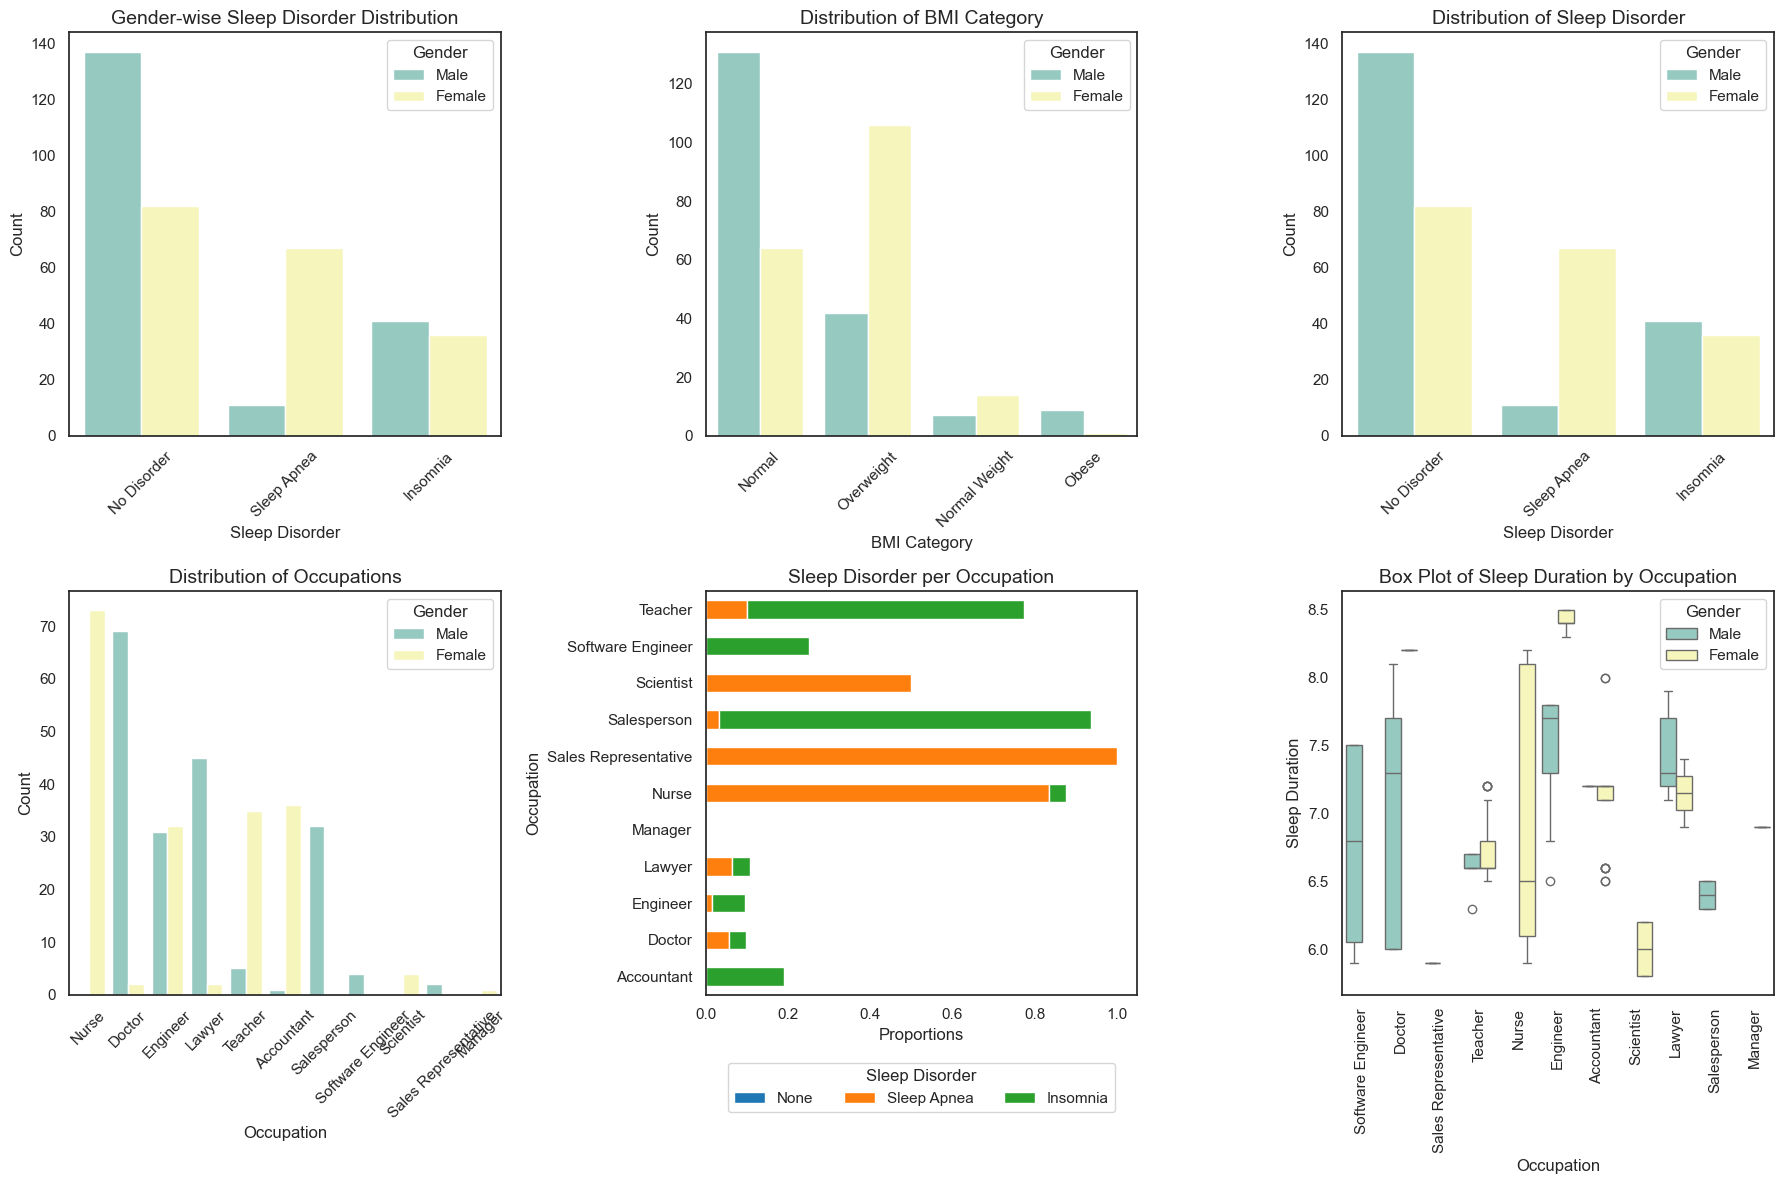

In [13]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Distribution of Gender with different colors
sns.countplot(x='Sleep Disorder',hue='Gender', data=df,ax=axes[0, 0],order=df['Sleep Disorder'].value_counts().index)
axes[0, 0].set_title('Gender-wise Sleep Disorder Distribution', fontsize=14)
axes[0, 0].set_xlabel('Sleep Disorder', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)



# Plot 2: Distribution of BMI Category
sns.countplot(x='BMI Category',hue='Gender', data=df, ax=axes[0, 1], order=df['BMI Category'].value_counts().index)
axes[0, 1].set_title('Distribution of BMI Category', fontsize=14)
axes[0, 1].set_xlabel('BMI Category', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Distribution of Sleep Disorder
sns.countplot(x='Sleep Disorder',hue='Gender',data=df, ax=axes[0, 2], order=df['Sleep Disorder'].value_counts().index)
axes[0, 2].set_title('Distribution of Sleep Disorder', fontsize=14)
axes[0, 2].set_xlabel('Sleep Disorder', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)
axes[0, 2].tick_params(axis='x', rotation=45)


# Plot 4: Distribution of Occupation
sns.countplot(x='Occupation',hue='Gender', data=df, ax=axes[1, 0], order=df['Occupation'].value_counts().index)
axes[1, 0].set_title('Distribution of Occupations', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Sleep Disorder proportions per Occupation
occup_dis = df.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack(fill_value=0)
order_sleep_disorder = ['None', 'Sleep Apnea', 'Insomnia']
occup_dis = occup_dis.reindex(columns=order_sleep_disorder, fill_value=0)

occup_dis.plot(kind='barh', stacked=True, ax=axes[1, 1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].set_title('Sleep Disorder per Occupation', fontsize=14)
axes[1, 1].set_xlabel('Proportions', fontsize=12)
axes[1, 1].set_ylabel('Occupation', fontsize=12)
axes[1, 1].legend(title='Sleep Disorder', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Plot 6: Sleep Duration by Occupation
sns.boxplot(data=df, y='Sleep Duration', x='Occupation',hue='Gender', ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Sleep Duration by Occupation', fontsize=14)
axes[1, 2].set_xlabel('Occupation', fontsize=12)
axes[1, 2].set_ylabel('Sleep Duration', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


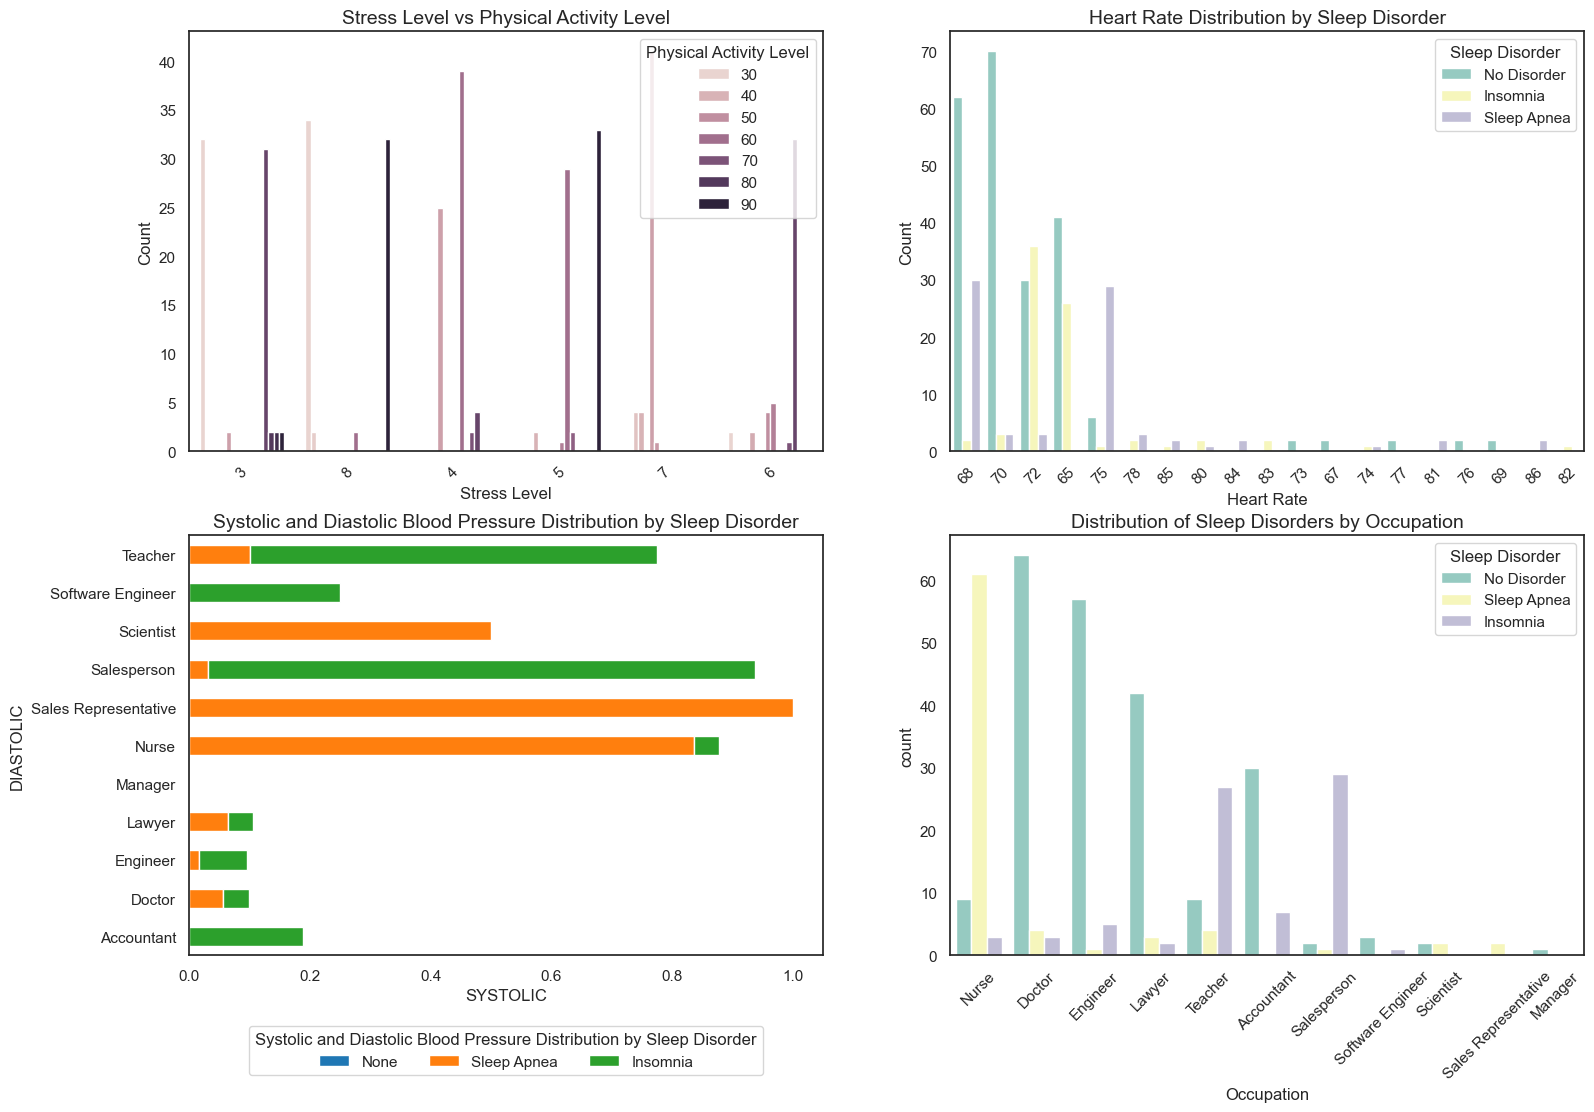

In [14]:
fig, axes = plt.subplots(2,2, figsize=(18, 12))
# Plot 1: Distribution of Sleep Disorder
sns.countplot(x='Stress Level',hue='Physical Activity Level',data=df, ax=axes[0, 0], order=df['Stress Level'].value_counts().index)
axes[0, 0].set_title('Stress Level vs Physical Activity Level', fontsize=14)
axes[0, 0].set_xlabel('Stress Level', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)


#plot 2: Heart Rate Distribution by Sleep Disorder
sns.countplot(x='Heart Rate',hue='Sleep Disorder',data=df, ax=axes[0, 1], order=df['Heart Rate'].value_counts().index)
axes[0, 1].set_title('Heart Rate Distribution by Sleep Disorder', fontsize=14)
axes[0, 1].set_xlabel('Heart Rate', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)


occup_dis.plot(kind='barh', stacked=True, ax=axes[1, 0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_title('Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder', fontsize=14)
axes[1, 0].set_xlabel('SYSTOLIC', fontsize=12)
axes[1, 0].set_ylabel('DIASTOLIC', fontsize=12)
axes[1, 0].legend(title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)



#plot 4: Distribution of Sleep Disorders by Occupation
sns.countplot(x='Occupation',hue='Sleep Disorder',data=df, ax=axes[1, 1], order=df['Occupation'].value_counts().index)
axes[1, 1].set_title('Distribution of Sleep Disorders by Occupation', fontsize=14)
axes[1, 1].set_xlabel('Occupation', fontsize=12)
axes[1, 1].set_ylabel('count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()


In [15]:
#Renaming

In [16]:
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [17]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [18]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()


Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

In [19]:
#Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
cat_columns = ['Occupation', 'BMI Category', 'Sleep Disorder', 'Gender']

for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# # Save label encoders
# for col, le in label_encoders.items():
#     joblib.dump(le, f'{col}_label_encoder.pkl')

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,27,5,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [21]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [22]:
#Balancing and scaling

In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import SMOTE

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
pip install --upgrade imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
#Splitting and Model Building

In [27]:
df.shape

(374, 15)

In [28]:
data.shape


(374, 13)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# # Save the scaler using joblib
# joblib.dump(scaler, 'minmax_scaler_split.pkl')

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8535353535353535
Precision: 0.8534375229290483
Recall: 0.8535353535353535
F1-score: 0.8533523642219295


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Save the scaler
joblib.dump(scaler, 'minmax_scaler_split.pkl')

# Print shapes
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.4, max_depth=8, random_state=1),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating model: {model_name}")
    model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
    y_pred = model.predict(x_test_scaled)  # Predict on scaled test data

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)

Evaluating model: K-Nearest Neighbors
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-score: 0.86

Evaluating model: Naive Bayes
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1-score: 0.87

Evaluating model: Gradient Boosting
Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1-score: 0.86

Evaluating model: Support Vector Classifier
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87

Evaluating model: Random Forest
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87


In [32]:
#Hyperparameter tuning finding the best parameters

Decision Tree Evaluation Metrics:
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1-score: 0.87


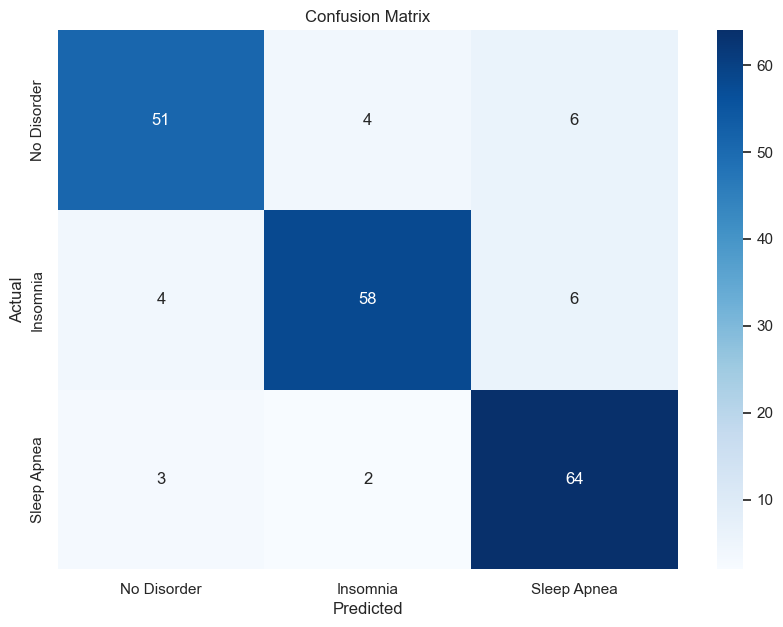

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier with class_weight='balanced'
model = DecisionTreeClassifier(class_weight='balanced')

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Decision Tree Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, classes):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Define class names for the confusion matrix
classes = ['No Disorder', 'Insomnia', 'Sleep Apnea']

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes)


In [34]:
report = classification_report(y_test, y_pred, target_names=classes)
print(report)


              precision    recall  f1-score   support

 No Disorder       0.88      0.84      0.86        61
    Insomnia       0.91      0.85      0.88        68
 Sleep Apnea       0.84      0.93      0.88        69

    accuracy                           0.87       198
   macro avg       0.88      0.87      0.87       198
weighted avg       0.88      0.87      0.87       198



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'class_weight': [
        {0: 1.0, 1: 1.0, 2: 1.0},  # Equal weights
        {0: 3.0, 1: 1.0, 2: 4.0},  # Initial weights
        {0: 2.0, 1: 1.0, 2: 5.0},  # Adjusted weights
        {0: 4.0, 1: 1.0, 2: 3.0}   # Another variation
    ]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),  # Add random_state for reproducibility
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),  # Weighted F1-score as scoring metric
    cv=5  # 5-fold cross-validation
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the final Decision Tree model using the best parameters
final_model = DecisionTreeClassifier(class_weight=best_params['class_weight'], random_state=42)
final_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_final = final_model.predict(x_test)

# Calculate evaluation metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final, average='weighted')
recall_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

# Print evaluation metrics
print("\nFinal Model Evaluation:")
print(f"Accuracy: {accuracy_final:.2f}")
print(f"Precision: {precision_final:.2f}")
print(f"Recall: {recall_final:.2f}")
print(f"F1-score: {f1_final:.2f}")

# Optional: Display the classification report for detailed results
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=['No Disorder', 'Insomnia', 'Sleep Apnea']))


Best parameters: {'class_weight': {0: 1.0, 1: 1.0, 2: 1.0}}

Final Model Evaluation:
Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1-score: 0.86

Classification Report:
              precision    recall  f1-score   support

 No Disorder       0.84      0.87      0.85        61
    Insomnia       0.90      0.82      0.86        68
 Sleep Apnea       0.85      0.90      0.87        69

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198



In [36]:
from sklearn.metrics import classification_report

# Define the target class names
classes = ['No Disorder', 'Insomnia', 'Sleep Apnea']

# Generate the classification report
report = classification_report(y_test, y_pred_final, target_names=classes)

# Print the classification report
print("\nClassification Report:")
print(report)




Classification Report:
              precision    recall  f1-score   support

 No Disorder       0.84      0.87      0.85        61
    Insomnia       0.90      0.82      0.86        68
 Sleep Apnea       0.85      0.90      0.87        69

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198



In [37]:
pip install flask flask-cors pandas scikit-learn joblib


In [38]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs('model7', exist_ok=True)

# Save the trained model and scaler
with open('model7/trained_model7.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

with open('model7/scaler7.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [39]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs('model7', exist_ok=True)

# Save the trained model and scaler
with open('model7/trained_model7.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

with open('model7/scaler7.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")



Model and scaler saved successfully!


In [40]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'SYSTOLIC', 'DIASTOLIC'],
      dtype='object')

In [41]:
!pip install matplotlib seaborn